## Strava Data Analysis

This notebook join all the analysis made individually for the strava data as a final project for Practice: Software Development(Python) course. 

In [7]:
#Check the functions available in the .py
import strava_analysis
dir(strava_analysis)


Matplotlib is building the font cache; this may take a moment.


['DBSCAN',
 'DistanceBand',
 'G_Local',
 'HeatMap',
 'KNN',
 'KernelDensity',
 'MarkerCluster',
 'Moran_Local',
 'PCA',
 'Point',
 'Polygon',
 'StandardScaler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'advanced_hotspot_analysis',
 'cm',
 'create_activity_locations_plot',
 'create_clusters_plot',
 'create_correlation_heatmap',
 'create_dashboard_html',
 'create_distance_speed_scatter',
 'create_hotspots_plot',
 'create_interactive_map',
 'create_performance_distributions_plot',
 'create_temporal_patterns_plot',
 'ctx',
 'datetime',
 'display_html_map_simple',
 'extract_lat_lon',
 'folium',
 'generate_comprehensive_report',
 'go',
 'gpd',
 'load_strava_data',
 'main_analysis',
 'make_subplots',
 'map_activities_colored_by_speed',
 'map_df',
 'np',
 'pd',
 'pdist',
 'plot_speed_distribution',
 'plt',
 'px',
 'sns',
 'spatial_clustering_analysis',
 'squareform',
 'stats',
 'warnings']

In [2]:
# Import your functions
from strava_analysis import load_strava_data, plot_speed_distribution, extract_lat_lon, map_df, map_activities_colored_by_speed

### 1. Load the data
We use a function `load_strava_data()` that selects relevant columns, parses dates, and removes incomplete rows.


In [5]:
#Use first function, upload the data
df = load_strava_data("../LeafletUpdates/nicole_strava.csv")
df

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_latlng,end_latlng,map.summary_polyline,start_time
0,Lunch Walk,15871575629,Walk,3577.7,4433,0.807,2.740,83.4,2025-06-21,"[50.091034, 14.40804]","[50.085645, 14.404228]",obvpHiw|vAD@CELCABD@ABH?BHBAECDICQDAD{@KSGC?DW...,11:32:17
1,Morning Walk,15871575717,Walk,8080.4,9368,0.863,2.720,93.4,2025-06-20,"[50.084863, 14.440817]","[50.088818, 14.430049]",wytpHu|bwAmE|YGO?NDq@HAzAdAf@N`@^\r@Bx@LORLHTb...,10:58:27
2,Afternoon Walk 🇨🇿,15852219623,Walk,7417.3,7577,0.979,12.744,133.2,2025-06-19,"[50.090379, 14.442733]","[50.084548, 14.448283]",ixupHw`dwAx@a@}@LRCMGFQv@Bf@_@EERkAI_Ah@_BJeC`...,14:37:46
3,Afternoon Workout,15837368953,Workout,0.0,3965,0.000,0.000,0.0,2025-06-18,[],[],NaN,15:18:13
4,Night Ride,15841051812,Ride,11316.2,2907,3.893,8.300,30.9,2025-06-18,"[47.777358, 13.081949]","[47.7895, 13.041727]",_|rbH}cznA{@_@g@My@Ia@@_AEuAVYNILM\IFO?WUOFKn@...,08:01:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Morning Ride,9917797597,Ride,10296.7,3654,2.818,7.982,344.1,2023-06-10,"[4.297962170094252, -74.78609061799943]","[4.348327768966556, -74.83286884613335]",}ffYlumgMtCh@`@JzBb@l@^FF?NAJW~A{@nEQn@]t@aAbB...,07:35:28
241,Lunch Walk,9255579410,Walk,3998.6,3009,1.329,1.909,7.7,2023-02-25,"[4.75921, -74.066105]","[4.724326, -74.073518]",mf`\f~`cMtCc@rE_@b@AZEFBP?REJCfAITIt@Aj@GdBGdB...,12:39:16
242,Arbolito 🌲,8952619873,Ride,23473.4,7171,3.273,10.387,452.4,2023-01-06,"[4.297663, -74.784424]","[4.297661, -74.784449]",egfYjumgMhI|Af@XAj@oAtG{@fCqBzCcAj@qFhBoQhNy@f...,06:39:16
243,Ricaurte - Agua de Dios,8948754056,Ride,44084.1,6479,6.804,15.073,375.5,2023-01-05,"[4.295948, -74.786636]","[4.297545, -74.78435]",c{eYrwmgMV_@v@wDdBwFdH_RtHeL|RqPkTuIsFeBuQiHgK...,16:17:54


### 2. Visualize Speed
The function `plot_speed_distribution()` compares the average and max speeds using histograms.


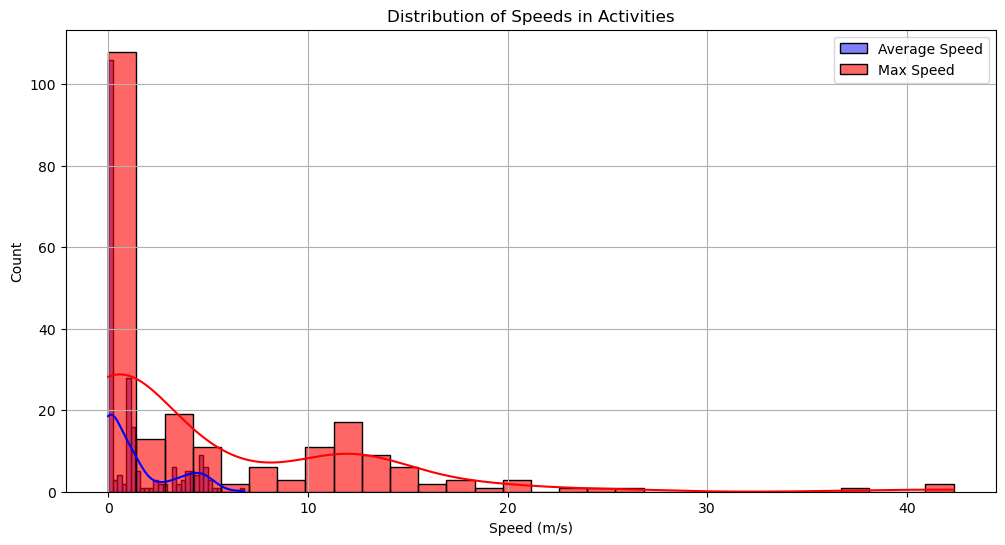

In [11]:
# plot speed distribution
plot_speed_distribution(df)

### 3.  Extract latitude and longitude

With `extract_lat_lon()`, we extract in two columns for each couple of coordenates separated information.

In [13]:
df['start_lat'], df['start_lon'] = zip(*df['start_latlng'].map(extract_lat_lon))
df['end_lat'], df['end_lon'] = zip(*df['end_latlng'].map(extract_lat_lon))
df

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_latlng,end_latlng,map.summary_polyline,start_time,start_lat,start_lon,end_lat,end_lon
0,Afternoon HIIT,15470552955,Workout,0.0,4531,0.000,0.000,0.0,2025-05-16,[],[],NaN,17:44:26,NaN,NaN,NaN,NaN
1,Evening HIIT,15460331668,Workout,0.0,3774,0.000,0.000,0.0,2025-05-15,[],[],NaN,18:24:27,NaN,NaN,NaN,NaN
2,Lunch Ride - Innersbachklamm,15449061470,Ride,102228.0,21805,4.688,18.043,545.7,2025-05-14,"[47.810196, 13.038183]","[47.810232, 13.038135]",oaybHkcqnAvMdFfBnr@{CZrCh@LbIqE`X~OpMaHzGqPnz@...,11:02:05,47.810196,13.038183,47.810232,13.038135
3,Night Workout,15439339287,Workout,0.0,4233,0.000,0.000,0.0,2025-05-13,[],[],NaN,20:38:54,NaN,NaN,NaN,NaN
4,Afternoon Workout,15426341743,Workout,0.0,7148,0.000,0.000,0.0,2025-05-12,[],[],NaN,17:59:28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Morning Ride,9917797597,Ride,10296.7,3654,2.818,7.982,344.1,2023-06-10,"[4.297962170094252, -74.78609061799943]","[4.348327768966556, -74.83286884613335]",}ffYlumgMtCh@`@JzBb@l@^FF?NAJW~A{@nEQn@]t@aAbB...,07:35:28,4.297962,-74.786091,4.348328,-74.832869
216,Lunch Walk,9255579410,Walk,3998.6,3009,1.329,1.909,7.7,2023-02-25,"[4.75921, -74.066105]","[4.724326, -74.073518]",mf`\f~`cMtCc@rE_@b@AZEFBP?REJCfAITIt@Aj@GdBGdB...,12:39:16,4.759210,-74.066105,4.724326,-74.073518
217,Arbolito 🌲,8952619873,Ride,23473.4,7171,3.273,10.387,452.4,2023-01-06,"[4.297663, -74.784424]","[4.297661, -74.784449]",egfYjumgMhI|Af@XAj@oAtG{@fCqBzCcAj@qFhBoQhNy@f...,06:39:16,4.297663,-74.784424,4.297661,-74.784449
218,Ricaurte - Agua de Dios,8948754056,Ride,44084.1,6479,6.804,15.073,375.5,2023-01-05,"[4.295948, -74.786636]","[4.297545, -74.78435]",c{eYrwmgMV_@v@wDdBwFdH_RtHeL|RqPkTuIsFeBuQiHgK...,16:17:54,4.295948,-74.786636,4.297545,-74.784350


### 4. Map the Activity starts and end points
With `map_df()`, we visualize where each activity began using folium.


In [14]:
#Show activity start points
fmap = map_df(df)
fmap

### 5. Map of average speead start points
With `map_activities_colored_by_speed()`, we visualize the activity start point color-coded by average speed.

In [16]:
speed_map = map_activities_colored_by_speed(df)
speed_map

# More geostatistical analysis

In [9]:
from strava_analysis import (
    load_strava_data,
    advanced_hotspot_analysis,
    spatial_clustering_analysis,
    create_activity_locations_plot,
    create_hotspots_plot,
    create_performance_distributions_plot,
    create_temporal_patterns_plot,
    create_correlation_heatmap,
    create_distance_speed_scatter,
    create_clusters_plot,
    create_interactive_map,
    create_dashboard_html,
    display_html_map_simple,
    generate_comprehensive_report,
    main_analysis
)

loaded 245 of your raw activities
processed 124 of your activities with enhanced features
     hotspots: 3
     coldspots: 0
     spatial clusters: 61
     spatial outliers: 13
     hotspots: 6
     coldspots: 0
     spatial clusters: 69
     spatial outliers: 12
     hotspots: 9
     coldspots: 0
     spatial clusters: 38
     spatial outliers: 9
found 7 clusters with 54 noise points


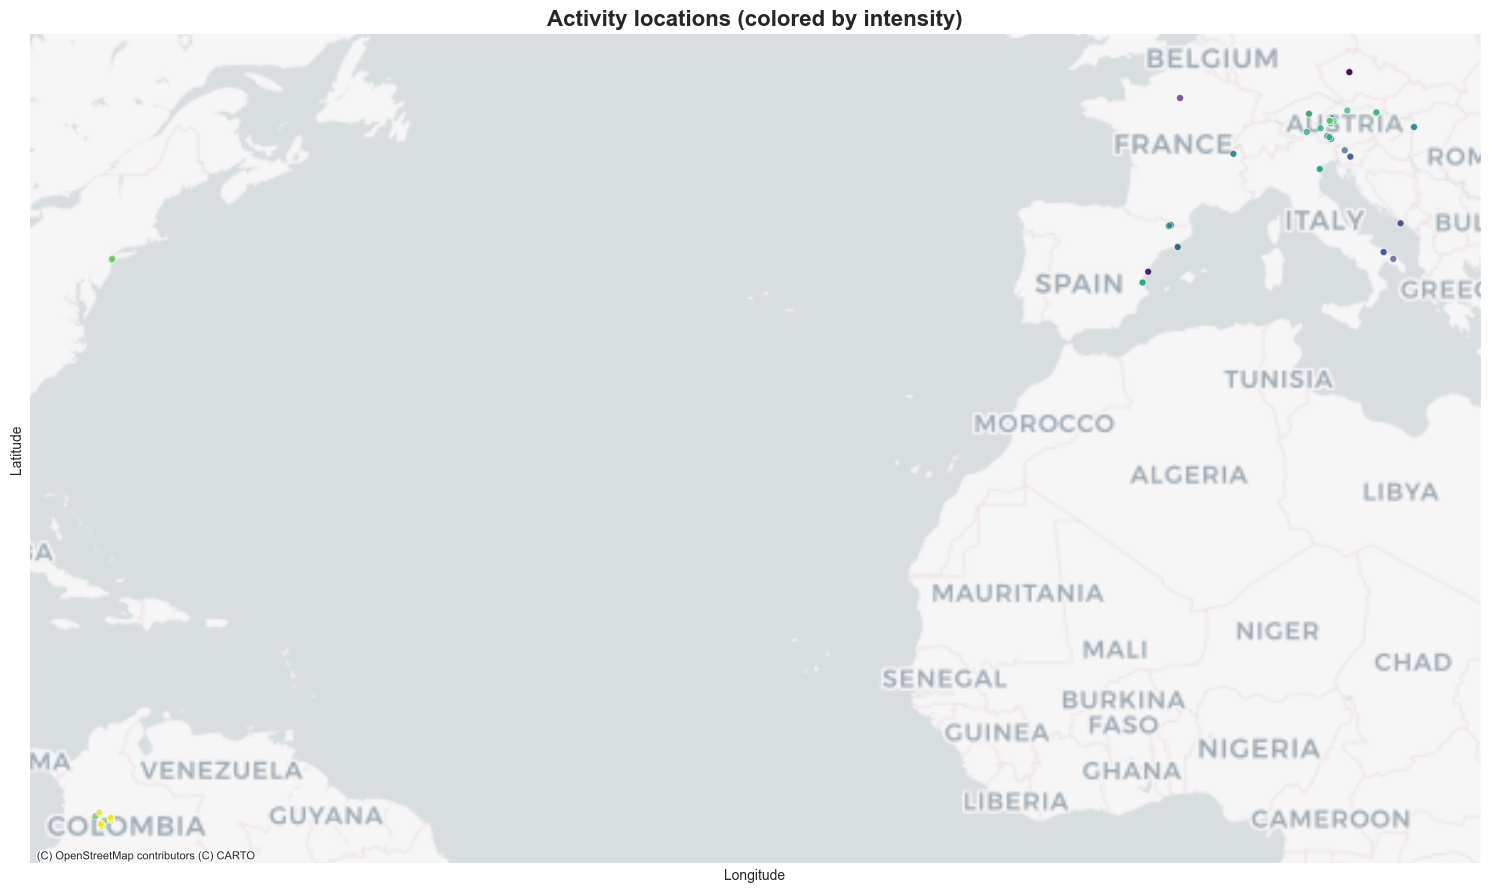

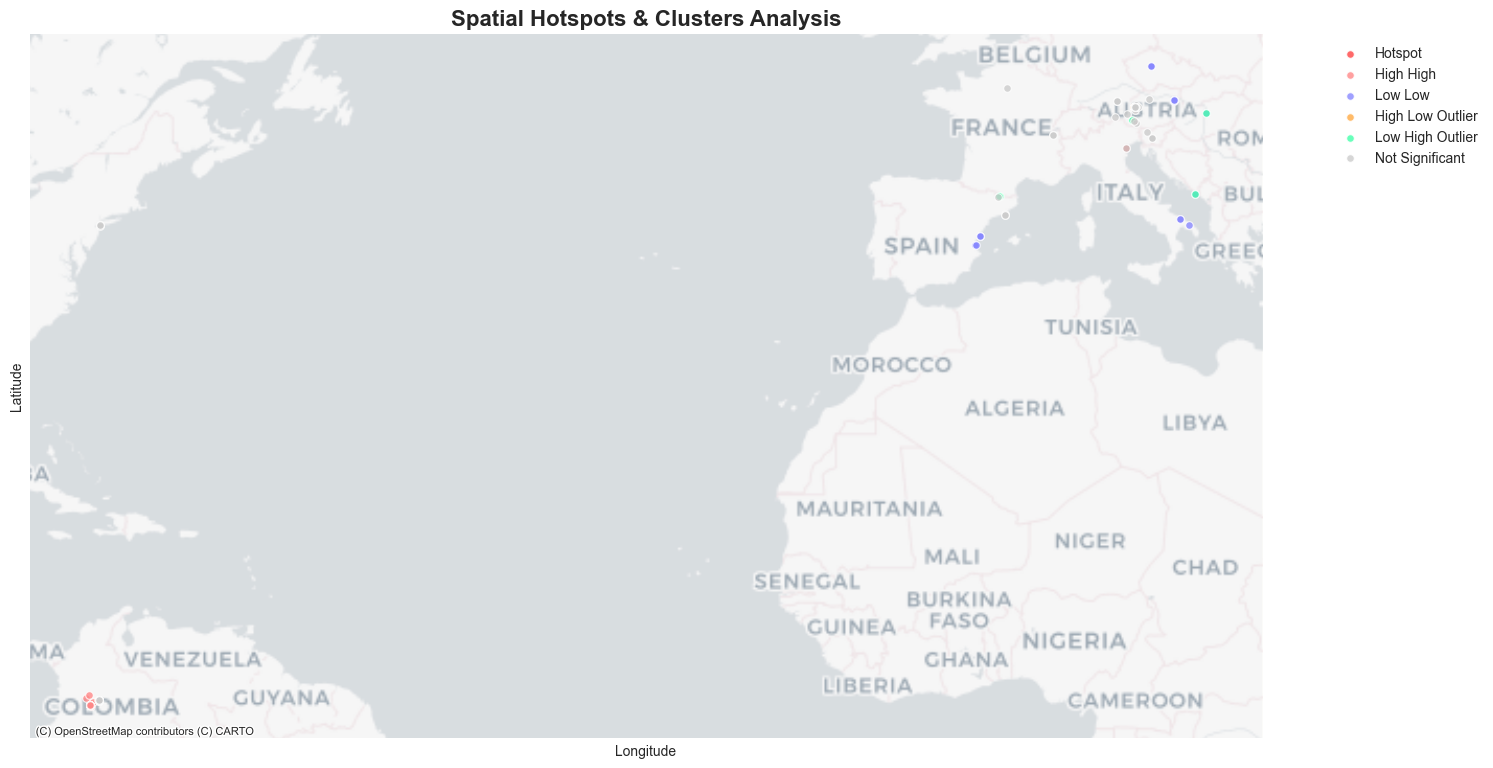

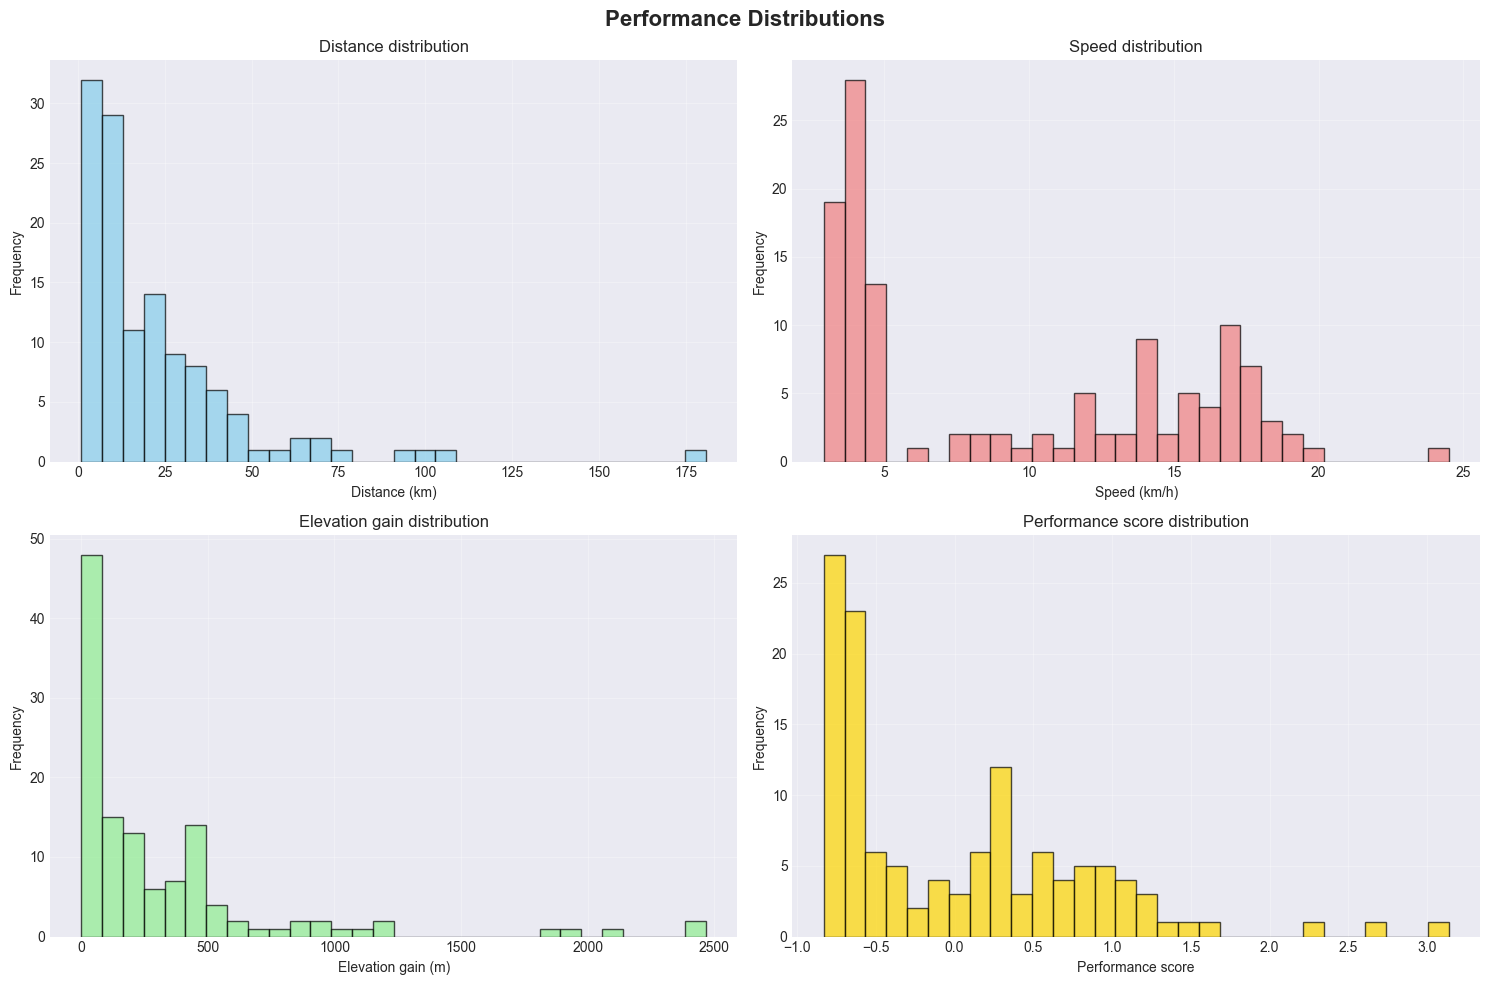

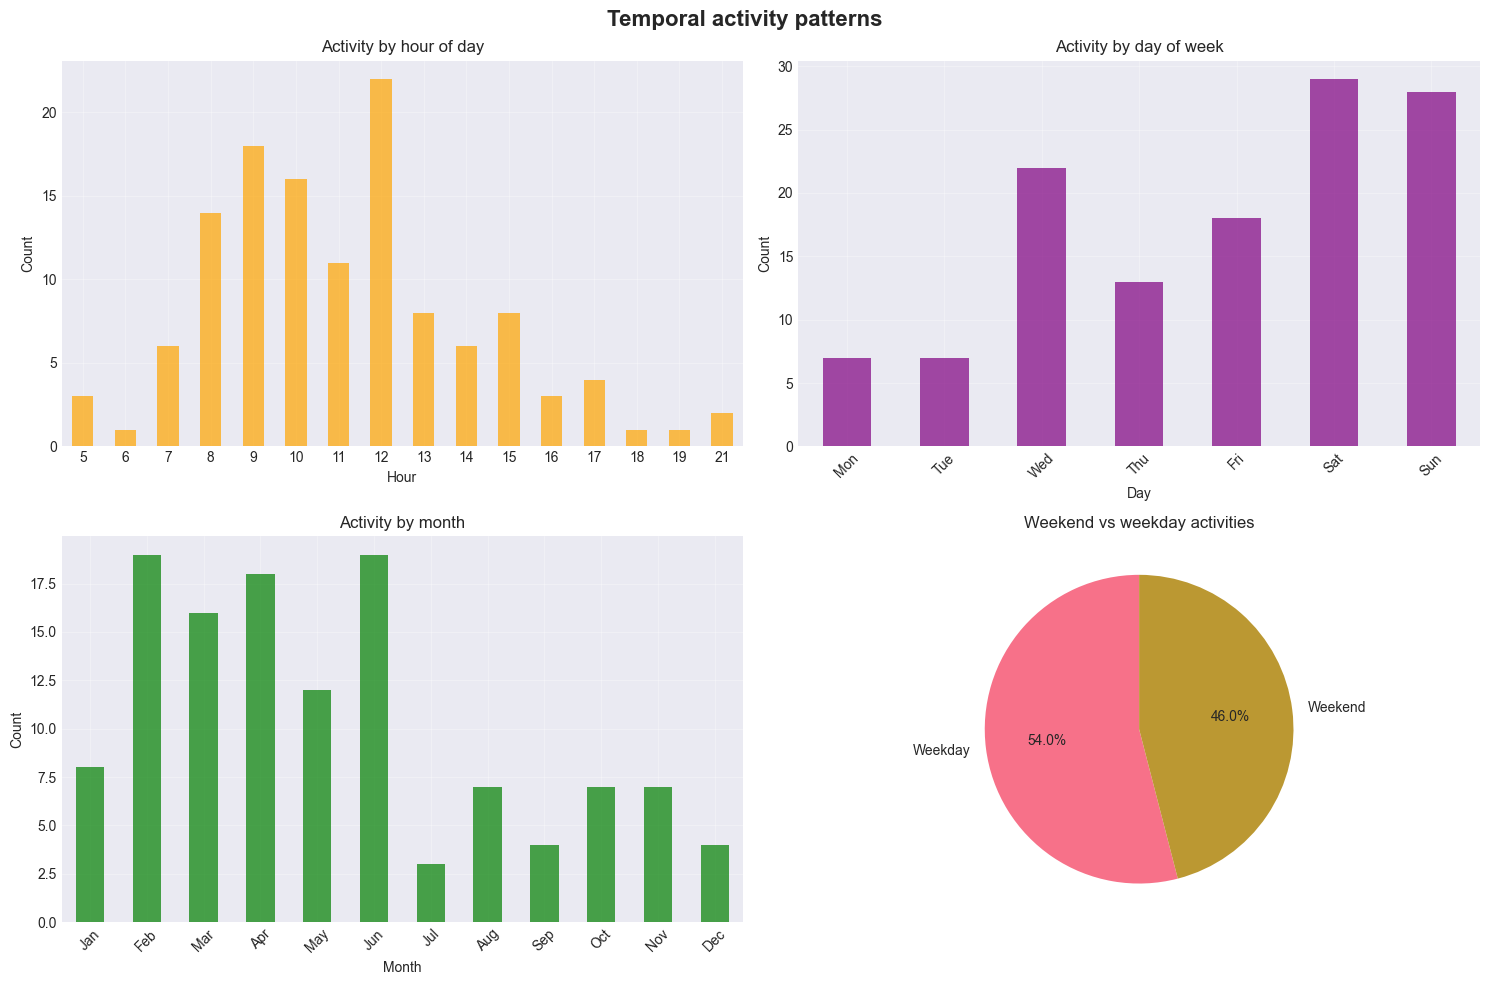

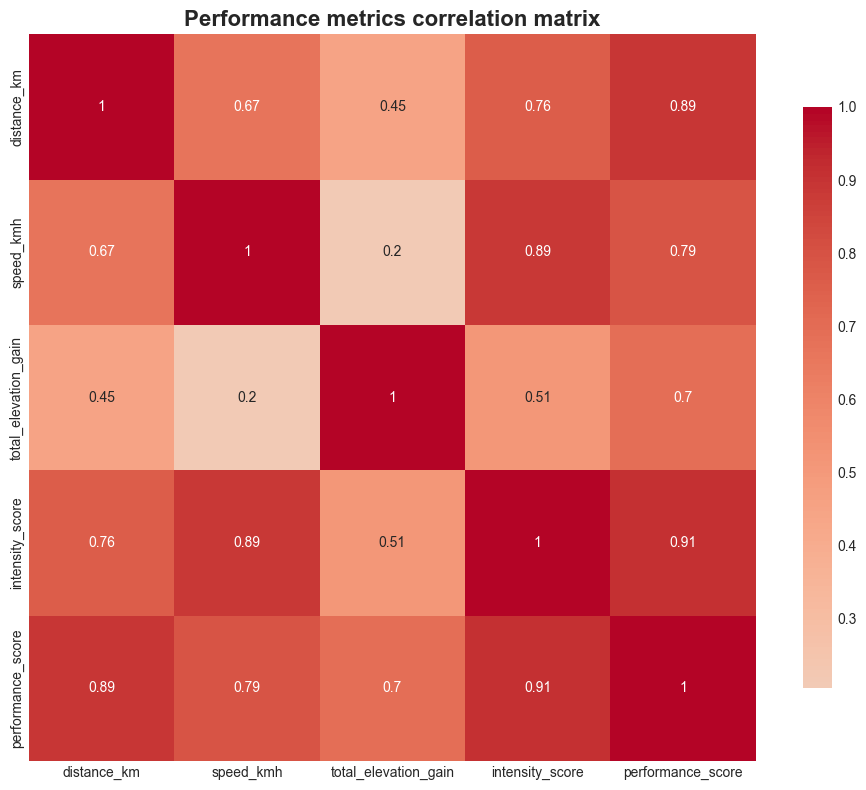

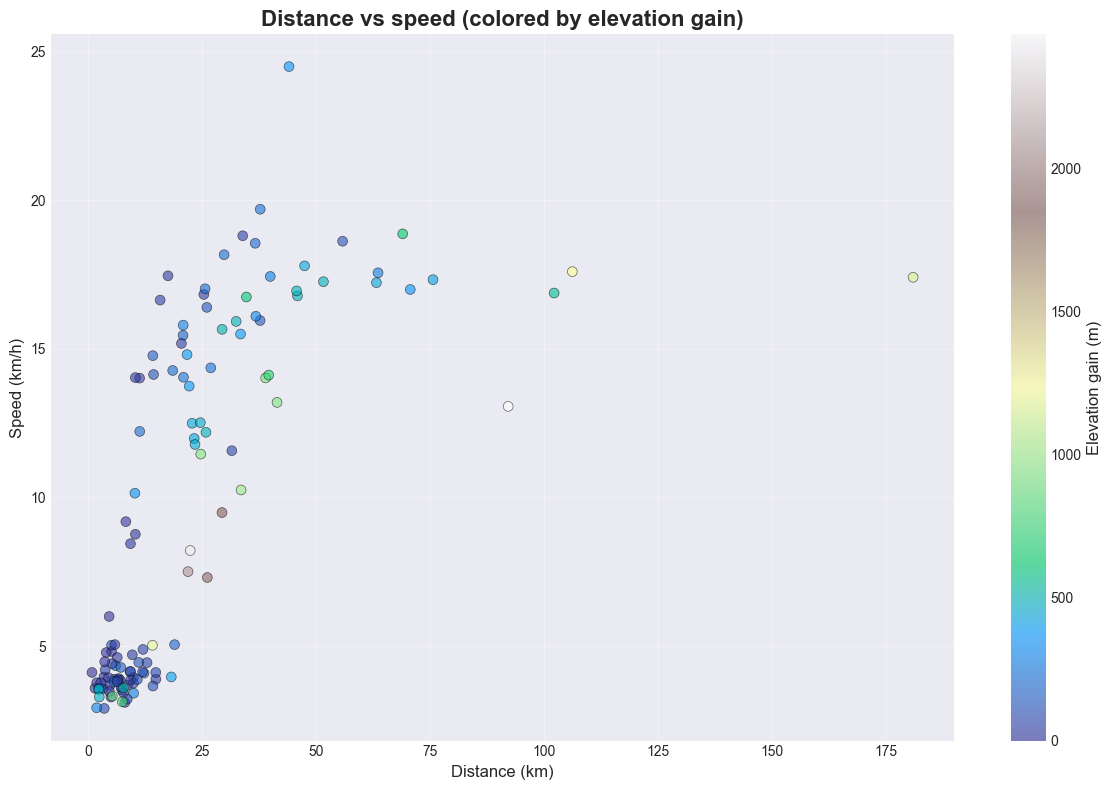

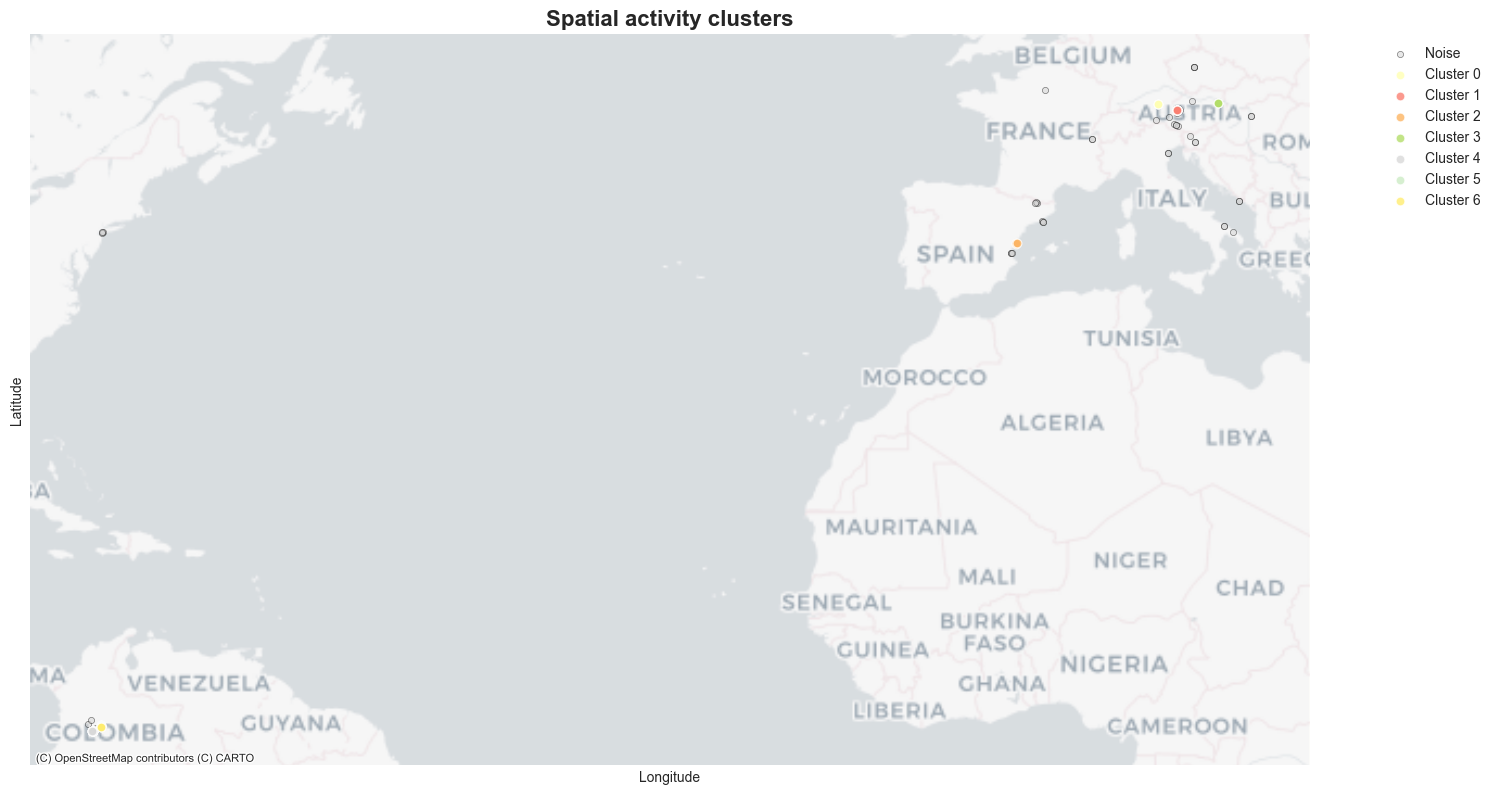


Creating interactive map
saved interactive map: strava_interactive_map.html

Generating report...
   saved report: strava_comprehensive_report.txt

Creating dashboard...
   saved dashboard: strava_dashboard.html

Exporting results as csv

Analysis complete!

generated files:
• individual visualization PNGs (7 files)
• strava_interactive_map.html (interactive map)
• strava_dashboard.html (beautiful dashboard)
• strava_comprehensive_report.txt (detailed report)
• strava_enhanced_results.csv (enhanced dataset)
opening strava_interactive_map.html...


   map displayed successfully!
   open this file in your browser !

Quick summary:
• Analyzed 124 activities
• Total distance: 2,757 km
• Average speed: 9.4 km/h
• found 7 spatial clusters

all visualizations are now separate files!
interactive map displayed above (if supported)
open strava_dashboard.html for a beautiful overview!


In [12]:

csv_file = "../LeafletUpdates/nicole_strava.csv"

results = main_analysis(csv_file)

gdf, hotspots, clusters = results
print(f"\nQuick summary:")
print(f"• Analyzed {len(gdf):,} activities")
print(f"• Total distance: {gdf['distance_km'].sum():,.0f} km")
print(f"• Average speed: {gdf['speed_kmh'].mean():.1f} km/h")
if clusters is not None and len(clusters) > 0:
    print(f"• found {len(clusters)} spatial clusters")

print("\nall visualizations are now separate files!")
print("interactive map displayed above (if supported)")
print("open strava_dashboard.html for a beautiful overview!")

In [15]:
from IPython.display import HTML
import base64

with open('/Users/apple/Desktop/strava-union/Strava-Dashboard/union/strava_interactive_map.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

iframe_html = f'''
<iframe srcdoc="{html_content.replace('"', '&quot;')}"
        width="100%" height="600" frameborder="0">
</iframe>
'''
HTML(iframe_html)

In [16]:
with open('/Users/apple/Desktop/strava-union/Strava-Dashboard/union/strava_dashboard.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

iframe_html = f'''
<iframe srcdoc="{html_content.replace('"', '&quot;')}"
        width="100%" height="600" frameborder="0">
</iframe>
'''
HTML(iframe_html)